In [9]:
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [20]:
df = pd.DataFrame()
for data in Path('./wandb_runs/').glob('*.csv'):
    tmp_df = pd.read_csv(data)
    tmp_df['data_name'] = data.name.split('.')[0]
    tmp_df['dataset'] = data.name.split('.')[0].split('_')[0]
    tmp_df['data_version'] = data.name.split('.')[0].split('_')[1]
    tmp_df[''] = data.name.split('.')[0]
    df = pd.concat([df, tmp_df], ignore_index=True)
df = df[df['val_acc_epoch'].notna()]
df.shape

(300, 35)

In [84]:
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,batch_norm,batch_size,...,val_loss_agr_epoch,val_loss_con_epoch,val_loss_epoch,val_loss_ext_epoch,val_loss_neu_epoch,val_loss_ope_epoch,data_name,dataset,data_version,
0,colorful-sweep-9,finished,-,krl1,NaN,2022-06-01T06:55:28.000Z,3327,da2dex70,True,64,...,1.526198,1.617171,1.520459,1.450926,1.631847,1.376151,ChaLearn_gray,ChaLearn,gray,ChaLearn_gray
1,splendid-sweep-8,finished,-,krl1,NaN,2022-06-01T06:14:43.000Z,2436,da2dex70,False,128,...,2.833635,3.069160,3.107629,3.643340,3.414737,2.577276,ChaLearn_gray,ChaLearn,gray,ChaLearn_gray
2,flowing-sweep-7,finished,-,krl1,NaN,2022-06-01T04:40:57.000Z,5595,da2dex70,True,128,...,1.477318,1.568090,1.604613,1.772551,1.838734,1.366370,ChaLearn_gray,ChaLearn,gray,ChaLearn_gray
3,hearty-sweep-6,finished,-,krl1,NaN,2022-06-01T03:23:42.000Z,4634,da2dex70,True,64,...,0.625443,0.730191,0.712787,0.812315,0.809649,0.586338,ChaLearn_gray,ChaLearn,gray,ChaLearn_gray
4,restful-sweep-5,finished,-,krl1,NaN,2022-06-01T02:21:35.000Z,3726,da2dex70,True,64,...,0.859066,0.890105,0.877057,0.970091,0.927338,0.738685,ChaLearn_gray,ChaLearn,gray,ChaLearn_gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,leafy-sweep-5,finished,-,krl1,NaN,2022-05-30T10:49:21.000Z,115,7vsvsbe8,False,4,...,0.357952,0.938431,0.628284,0.477074,0.548436,0.819525,BFD_rgb,BFD,rgb,BFD_rgb
296,stellar-sweep-4,finished,-,krl1,NaN,2022-05-30T10:48:15.000Z,61,7vsvsbe8,True,2,...,0.636952,0.636834,0.650486,0.642449,0.633479,0.702716,BFD_rgb,BFD,rgb,BFD_rgb
297,still-sweep-3,finished,-,krl1,NaN,2022-05-30T10:46:53.000Z,78,7vsvsbe8,False,2,...,0.722765,0.717347,0.707012,0.716091,0.686442,0.692415,BFD_rgb,BFD,rgb,BFD_rgb
298,vague-sweep-2,finished,-,krl1,NaN,2022-05-30T10:42:24.000Z,265,7vsvsbe8,True,16,...,0.596715,0.598266,0.610268,0.567418,0.587287,0.701652,BFD_rgb,BFD,rgb,BFD_rgb


In [85]:
important_columns = ['Name', 'batch_norm', 'batch_size', 'dropout', 'lr', 'negative_slope', 'epoch','train_acc_epoch', 'train_loss_epoch', 'trainer/global_step', 'val_acc_epoch','val_loss_epoch','data_name', 'dataset','data_version']

In [21]:
df.groupby(['data_name']).size()

data_name
BFD_enc          50
BFD_gray         50
BFD_rgb          50
ChaLearn_enc     50
ChaLearn_gray    50
ChaLearn_rgb     50
dtype: int64

In [22]:
hyperparameters = ['batch_norm', 'batch_size', 'dropout', 'lr', 'negative_slope']
for hyperparameter in hyperparameters:
    print(df.groupby([hyperparameter]).size())
    print()

batch_norm
False    149
True     151
dtype: int64

batch_size
2      46
4      41
8      42
16     52
32     44
64     48
128    27
dtype: int64

dropout
0.0    67
0.1    72
0.2    56
0.3    53
0.4    52
dtype: int64

lr
0.000005    33
0.000010    42
0.000050    29
0.000100    41
0.000500    37
0.001000    42
0.005000    45
0.010000    31
dtype: int64

negative_slope
0.00    70
0.01    53
0.02    64
0.05    55
0.10    58
dtype: int64



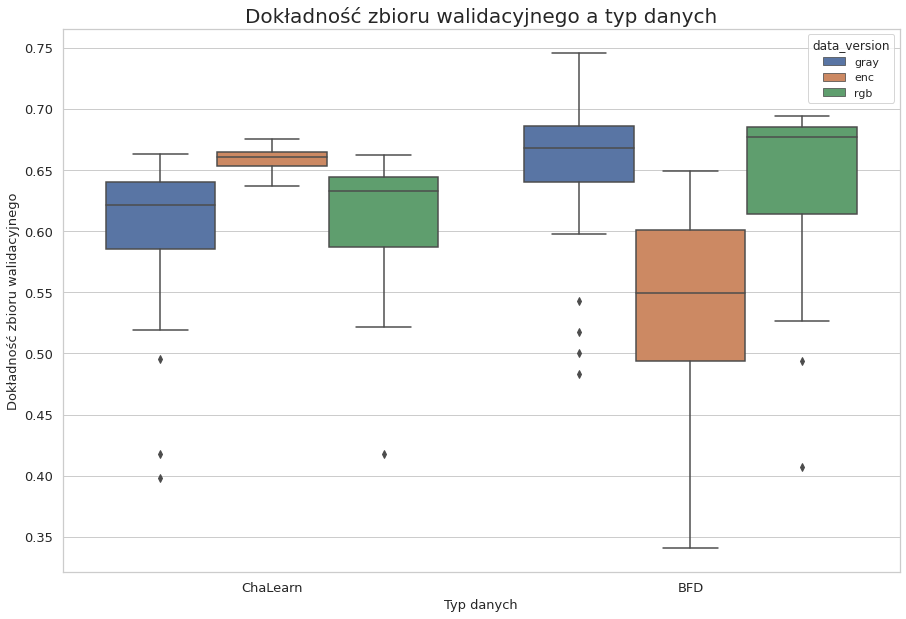

In [25]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="dataset", y="val_acc_epoch", hue='data_version', data=df)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});

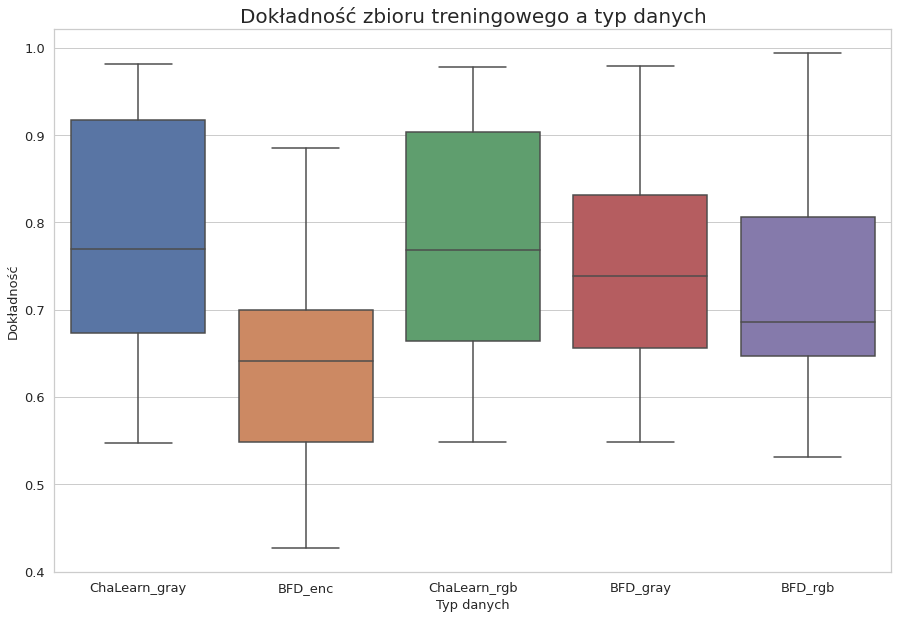

In [7]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="data_name", y="train_acc_epoch", data=df)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru treningowego a typ danych', fontdict={'fontsize':20});

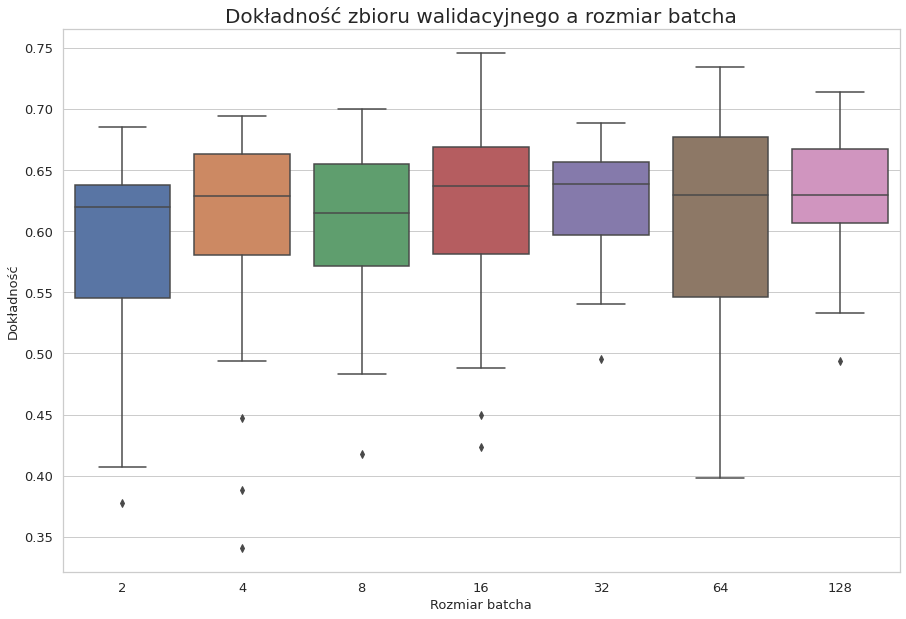

In [8]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="batch_size", y="val_acc_epoch", data=df)
plt.xlabel("Rozmiar batcha", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
# plt.legend(loc='best')
plt.title('Dokładność zbioru walidacyjnego a rozmiar batcha', fontdict={'fontsize':20});

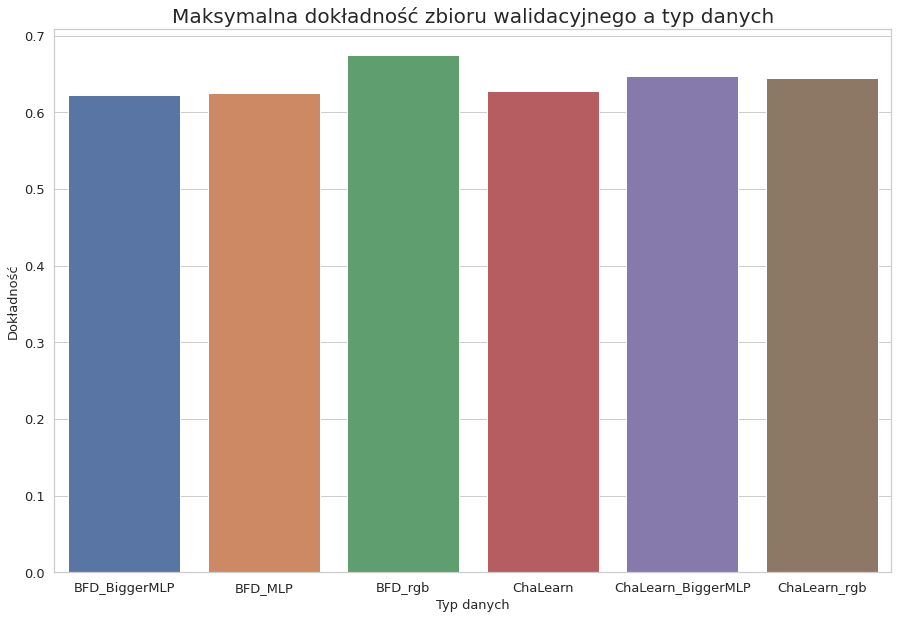

In [114]:
data_name_max = df.groupby(['data_name'])['val_acc_epoch'].max()
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data_name_max.keys(), y=data_name_max.values)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Maksymalna dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});

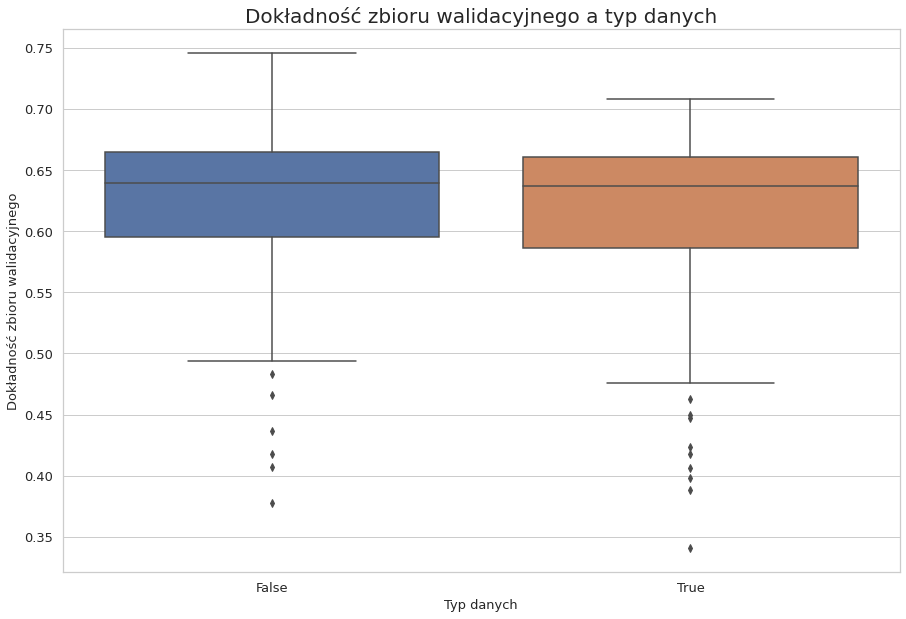

In [40]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="batch_norm", y="val_acc_epoch", data=df)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});

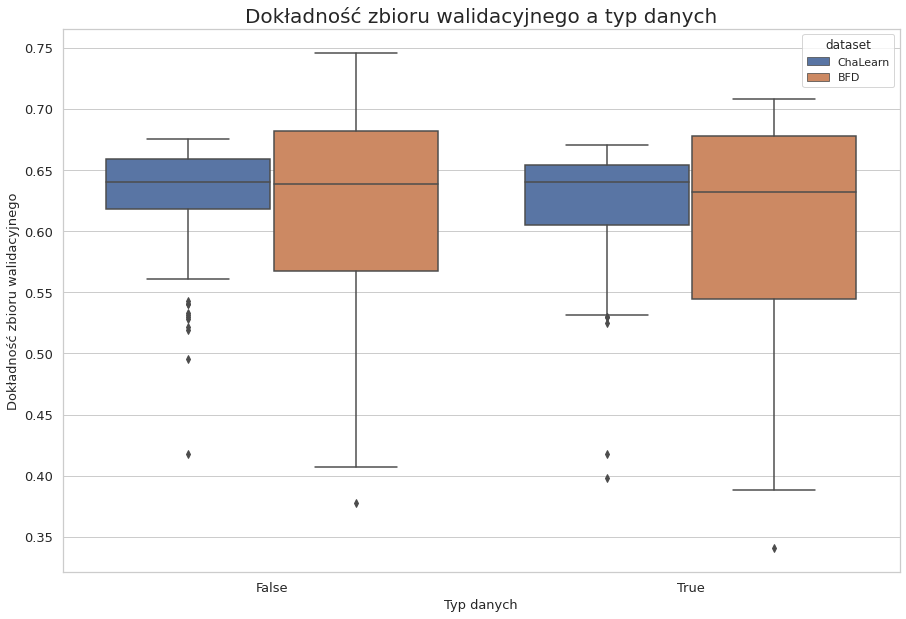

In [42]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="batch_norm", y="val_acc_epoch", hue='dataset', data=df)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});

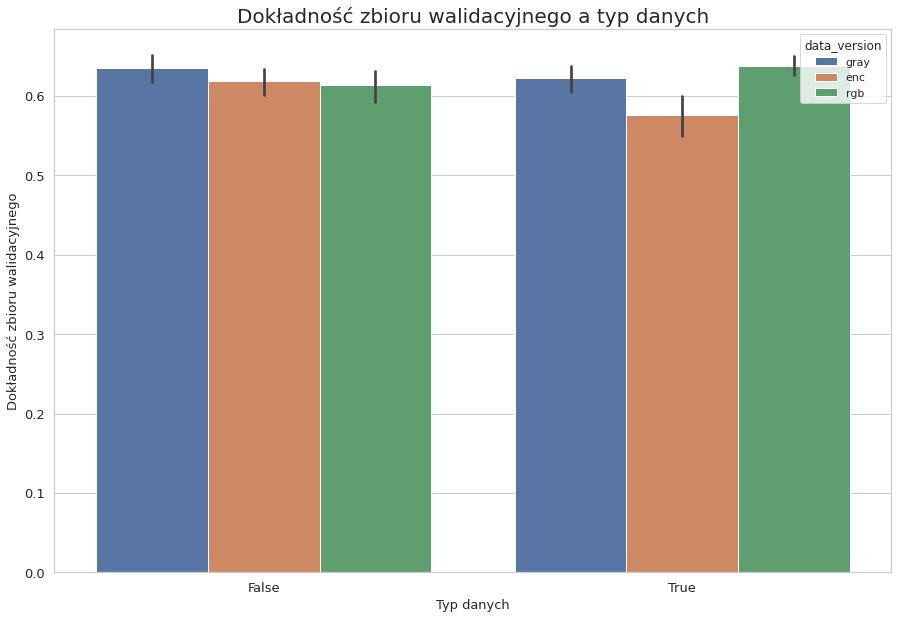

In [51]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.barplot(x="batch_norm", y="val_acc_epoch", hue='data_version', data=df)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});

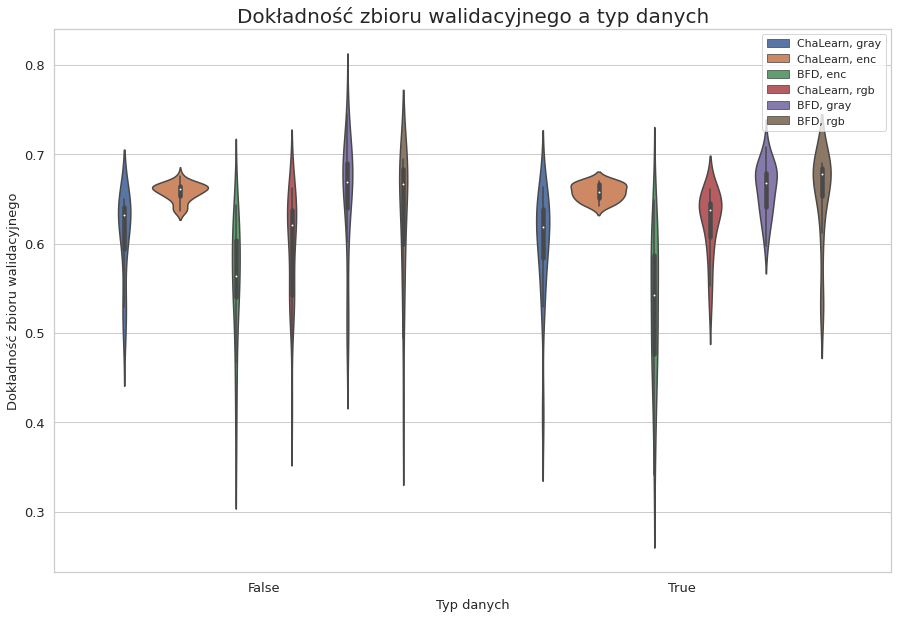

In [61]:
labels_font_size = 13
plt.figure(figsize=(15,10))
hue = df['dataset'].astype(str) + ', ' + df['data_version'].astype(str)
ax = sns.violinplot(x="batch_norm", y="val_acc_epoch", hue=hue, data=df)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});

<Figure size 1080x720 with 0 Axes>

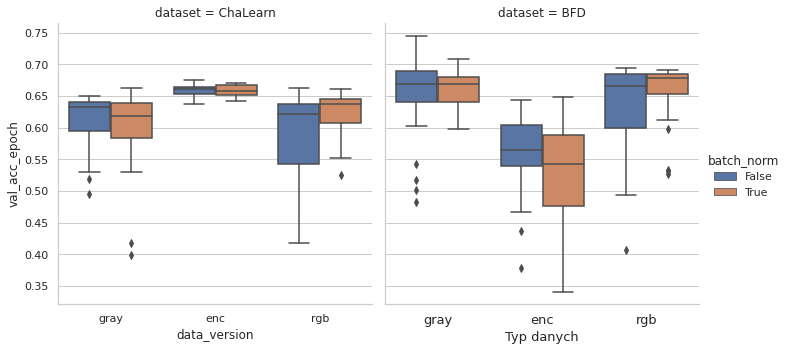

In [71]:
labels_font_size = 13
plt.figure(figsize=(15,10))
# ax = sns.barplot(x="batch_norm", y="val_acc_epoch", hue='data_version', data=df)
ax = sns.catplot(x = "data_version", 
                 y = "val_acc_epoch",
                 hue = "batch_norm", 
                 col = "dataset", 
                 data = df, 
                 kind = "box")
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size);
# plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});


<Figure size 1080x720 with 0 Axes>

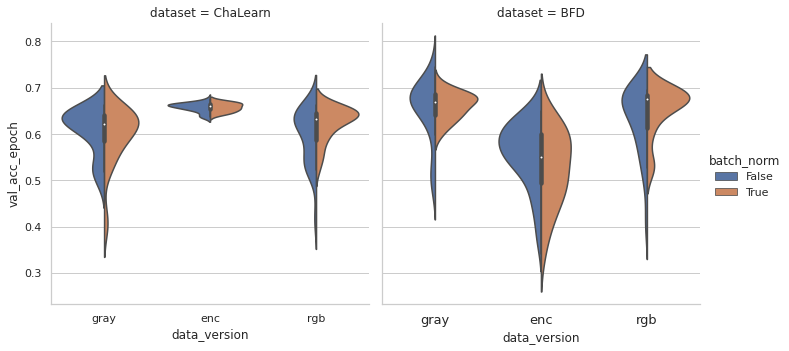

In [73]:
labels_font_size = 13
plt.figure(figsize=(15,10))
# ax = sns.barplot(x="batch_norm", y="val_acc_epoch", hue='data_version', data=df)
ax = sns.catplot(x = "data_version", 
                 y = "val_acc_epoch",
                 hue = "batch_norm", 
                 col = "dataset", 
                 data = df, 
                 kind = "violin",
                 split=True)
# plt.xlabel("Typ danych", fontsize=labels_font_size)
# plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size);
# plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});


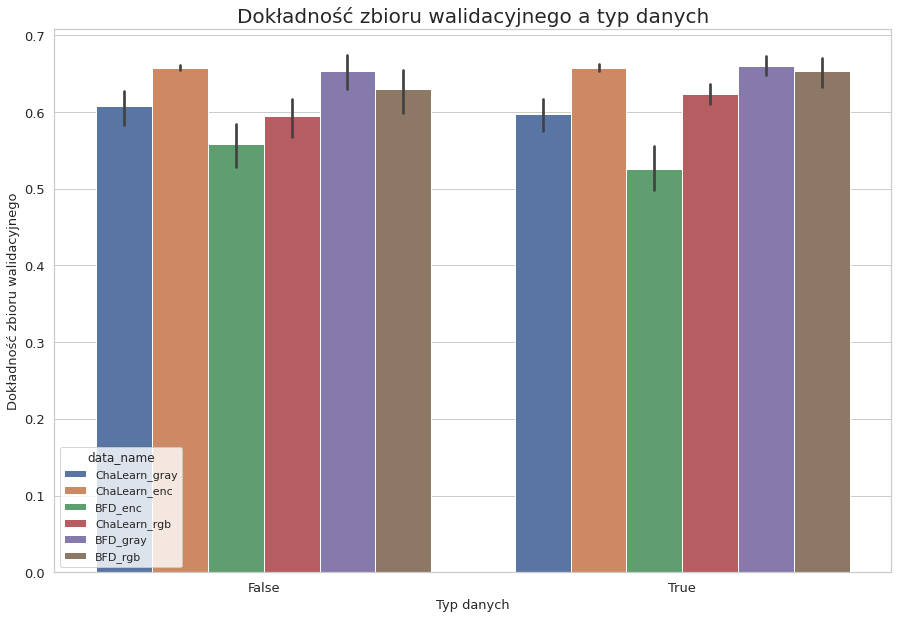

In [43]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.barplot(x="batch_norm", y="val_acc_epoch", hue='data_name', data=df)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});

In [87]:
df_cha_enc = df[df['data_name']=='ChaLearn_enc'].copy()
df_bfd_enc = df[df['data_name']=='BFD_enc'].copy()

In [86]:
df_cha_enc[df_cha_enc['val_acc_epoch']==df_cha_enc['val_acc_epoch'].max()][important_columns]

,Name,batch_norm,batch_size,dropout,lr,negative_slope,epoch,train_acc_epoch,train_loss_epoch,trainer/global_step,val_acc_epoch,val_loss_epoch,data_name,dataset,data_version
58,astral-sweep-2,False,4,0.3,0.001,0.1,12,0.70892,0.52306,84434,0.67553,0.602316,ChaLearn_enc,ChaLearn,enc


In [88]:
df_bfd_enc[df_bfd_enc['val_acc_epoch']==df_bfd_enc['val_acc_epoch'].max()][important_columns]

,Name,batch_norm,batch_size,dropout,lr,negative_slope,epoch,train_acc_epoch,train_loss_epoch,trainer/global_step,val_acc_epoch,val_loss_epoch,data_name,dataset,data_version
132,polar-sweep-18,True,64,0.4,0.000005,0.02,72,0.51329,0.717087,510,0.649079,0.671989,BFD_enc,BFD,enc


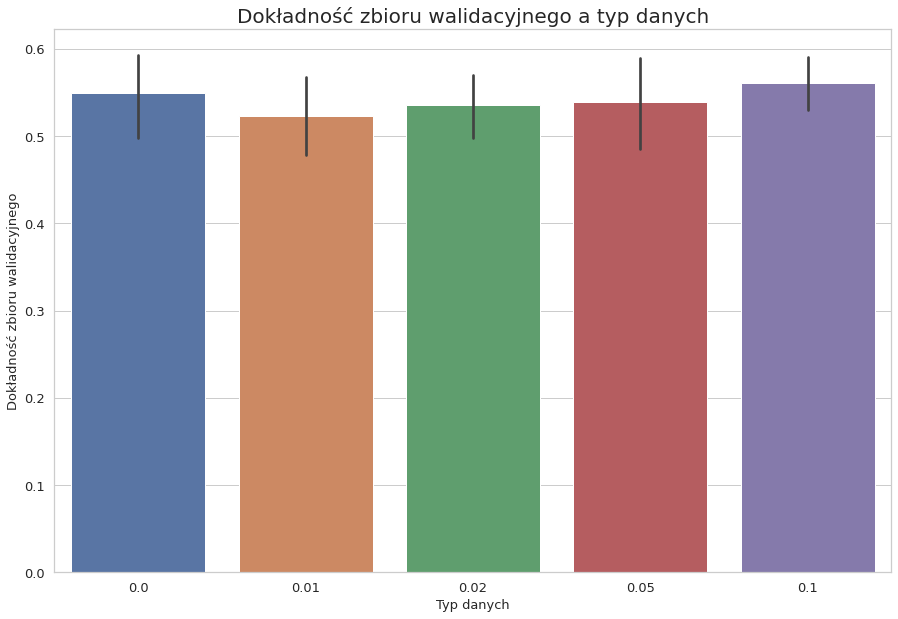

In [94]:
labels_font_size = 13
plt.figure(figsize=(15,10))
ax = sns.barplot(x="dropout", y="val_acc_epoch", data=df_bfd_enc)
plt.xlabel("Typ danych", fontsize=labels_font_size)
plt.ylabel("Dokładność zbioru walidacyjnego", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size)
plt.title('Dokładność zbioru walidacyjnego a typ danych', fontdict={'fontsize':20});